# Harmonic Oscillator

In [27]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.animation as animation
from IPython.display import HTML
from scipy.signal import find_peaks


In [28]:

def draw_spring(x0, y0, x1, y1, coils=10, amplitude=0.1):
    """Draws a spring between (x0, y0) and (x1, y1)."""
    num_points=500

    dx = x1 - x0
    dy = y1 - y0
    length = np.sqrt(dx**2 + dy**2)
    angle = np.arctan2(dy, dx)

    x_line = np.linspace(x0, x1, num_points)
    y_line = np.linspace(y0, y1, num_points)

    coil_x = amplitude * np.cos(np.linspace(0, coils * 2 * np.pi, num_points))
    coil_y = amplitude * np.sin(np.linspace(0, coils * 2 * np.pi, num_points))

    x_spring = x_line + coil_x * np.cos(angle + np.pi/2)
    y_spring = y_line + coil_y * np.sin(angle + np.pi/2)

    return x_spring, y_spring  # Return the spring coordinates

def draw_spring_system(spring_loc):
    xs,ys=draw_spring(-2, 0,spring_loc ,0,coils=10)
    plt.plot([-2.0,-2.0],[-0.25,0.25],color='red',linewidth=3,zorder=1)
    plt.plot(xs,ys,color='blue',linewidth=2,zorder=0)
    radius = 0.05
    circle = patches.Circle((spring_loc,0), radius, color='blue', fill=True)
    plt.gca().add_artist(circle)
    plt.axis('equal')
    plt.xlim(-3, 3)
    plt.show()

def animate_spring_system(x):
    fig, ax = plt.subplots()
    ax.plot([-2.0,-2.0],[-0.25,0.25],color='red',linewidth=3,zorder=1)
    line, = ax.plot([], [], lw=2, color='blue',zorder=0)  # Initialize an empty line object

    radius = 0.05
    circle = patches.Circle((0,0), radius, color='blue', fill=True)
    ax.add_artist(circle)
    top_val=np.max(np.abs(x))*1.1
    ax.set_xlim(-3, top_val)
    ax.set_ylim(-1, 1)

    def animate(i):
        x1 = x[i]  # x-coordinate changes over time
        xs, ys = draw_spring(-2, 0, x1, 0.0, coils=8, amplitude=0.10)
        line.set_data(xs, ys)
        circle.center = (x1,0)
        return line,circle,

    ani = animation.FuncAnimation(fig, animate, frames=len(x), blit=True, interval=20,repeat=False)
    ###save animation as html
    #ani.save('spring_system.html', writer='html')
    display(HTML(ani.to_jshtml()))
    plt.close()

Our goal in this assignment is to understand the Harmonic Oscillator

## Exercise 1. A Single Spring

### a. Simple Harmonic Oscillator

We will be working with a simple Harmonic oscillator in this part.  For the moment, we should think of this as a spring connected to a wall with a mass $m$ on the end.  We will work with the natural equilibrium length of the spring to be 2 and let the x-coordinate at the equilbrium length to be $x=0$ (so the deviation from the equilibrium and the x-coordinate match up).  To draw this spring go ahead an plot
```
draw_spring_system(0)
```
where the 0 represents that it is at $x=0$.

 <div><img src="https://clark.physics.illinois.edu/246img/AnsStart.svg" width=200 align=left alt="Answer (start)"></img><br></div>

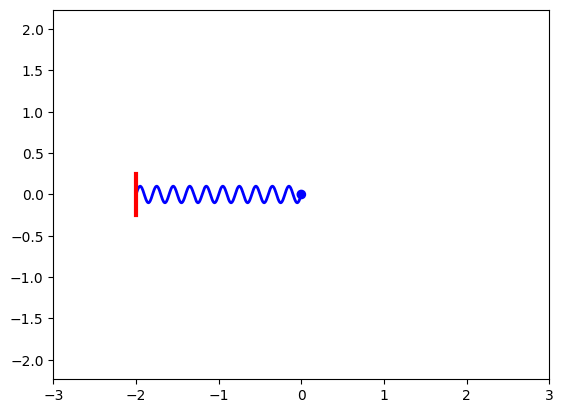

In [29]:
draw_spring_system(0)

 <div><img src="https://clark.physics.illinois.edu/246img/AnsEnd.svg" width=200 align=left alt="Answer (start)"></img><br></div>

The relevant differential equation for the simple Harmonic oscillator is

$$
m \ddot{x} = -k x
$$

again where $x$ represents the amount the spring is displaced away from its equilibrium position.  

To solve this with python, it will be convenient to instead write it out as two first-order equations,

$$
\dot{x} = v \\
\dot{v} = -\frac{k}{m} x
$$

where $v$ is the velocity of the mass.  

These equations can be directly translated into python:
```
def equations(state,t,k,m):
  x,v = state
  x_dot =v
  v_dot = -k/m*x
  return [x_dot,v_dot]
```

We can now get python to solve this differential equation for us.   We need to give it some initial conditions.  For example, we can stretch the spring out to $x=1$ and set the initial velocity to $v=0$ by doing
```
initial_state = [1, 0]
```
Then we need to specify which times $t$ we want to evaluate our differential equation with respect to.  Here let's choose a grid of 400 time points between 0 and $16\pi$ as
```
t = np.linspace(0, 16*np.pi, 100)
```

Finally, we need to pick some values for
```
k=1.3
m=2.25
```

Now we can solve our differential equation doing
```
sol = odeint(equations, initial_state, t, args=(k,m,))
x = sol[:, 0]
v= sol[:, 1]
```

Go ahead and solve this differential equation and plot it
```
fig, ax1 = plt.subplots()
ax1.plot(t,x) #<-- This is the important line which plots.
ax1.set_xlabel("t")
ax1.set_ylabel("x(t)",color='b')
ax1.tick_params('y', colors='b')  
plt.show()
```

Notice that your wave-length $\lambda = \frac{2\pi}{\omega}$ where the natural frequency $\omega = \sqrt{k/m}$.


Also go ahead and plot the velocity. You can plot it separately or if you want to plot it on the same figure so you can match the velocity and time before the `plt.show()` go ahead and do
```
ax2 = plt.gca().twinx()  
ax2.plot(t, v, 'r-',alpha=0.2)  #<--- you can turn up the alpha if it's too dim but I find it annoying to have them both be strong  
ax2.set_ylabel('v(t)', color='r')
ax2.tick_params('y', colors='r')
```


 <div><img src="https://clark.physics.illinois.edu/246img/AnsStart.svg" width=200 align=left alt="Answer (start)"></img><br></div>

In [ ]:
### ANSWER HERE

 <div><img src="https://clark.physics.illinois.edu/246img/AnsEnd.svg" width=200 align=left alt="Answer (end)"></img><br></div>

### b.  Computing the energy

We would now like to compute the energy

$$
E = \frac{1}{2}mv^2 + \frac{1}{2}kx^2
$$

of your system and show that it is constant.  It helps if you keep your y-limit from zero to one - i.e. `ax1.set_ylim(0,1)`.


 <div><img src="https://clark.physics.illinois.edu/246img/AnsStart.svg" width=200 align=left alt="Answer (start)"></img><br></div>

In [ ]:
### ANSWER HERE

 <div><img src="https://clark.physics.illinois.edu/246img/AnsEnd.svg" width=200 align=left alt="Answer (end)"></img><br></div>

### c. Animating your spring

We now want to animate your spring.  You can do this by calling
```
animate_spring_system(x)
```

on your x-coordinate.

 <div><img src="https://clark.physics.illinois.edu/246img/AnsStart.svg" width=200 align=left alt="Answer (end)"></img><br></div>

In [ ]:
### ANSWER HERE

 <div><img src="https://clark.physics.illinois.edu/246img/AnsEnd.svg" width=200 align=left alt="Answer (end)"></img><br></div>

### d.  A (under) damped Harmonic Oscillator

Now let's go ahead and introduce some damping.  The equation of motion for a damped harmonic oscillator is

$$
m \ddot{x} = -k x - c v
$$

Rewrite this out as a series of first-order differential equations and then modify your `equations(state,t,x,k,m,c)` function to solve this differential equation using the same starting conditions and values for $k$ amd $m$ as earlier. Start by using $c=0.2$.   Recall that the dissipation $\gamma=c/(2m\omega)$.  Since $\gamma<1$ this is the underdamped case.  

Plot the position and velocity as a function of time.  Also animate your spring.  

 <div><img src="https://clark.physics.illinois.edu/246img/AnsStart.svg" width=200 align=left alt="Answer (end)"></img><br></div>

In [ ]:
### ANSWER HERE

 <div><img src="https://clark.physics.illinois.edu/246img/AnsEnd.svg" width=200 align=left alt="Answer (end)"></img><br></div>

We would like to now check two things explicitly about the damped oscillator:

We expect that the wave-length of the damped oscillator should be $2\pi/\omega_d$ where $\omega_d \equiv \omega_n \sqrt{1-\gamma^2}$.  How much different is this from the natural frequency.   Verify this by extracting the peak locations of the undamped oscillator.  To do this we can use `my_peaks=find_peaks(x)[0].tolist()` and then use `t[my_peaks]` to get the time of the respective peaks.  Check that those times are all equidistance and that they happen at the prescribed wave-length.  The answer you will actually get if you do this will be reasonable but not super-accurate.  You can do better by (a) increasing the number of points in your `linspace` to 4000 (but don't rerun the animation becuase it will be very slow) and/or instead of using the difference in time between two peaks computing the slope `np.polyfit(range(0,len(peaks)),t[peaks],1)` and getting the slope.  

 Verify that the damped oscillator's strength decays exponentially.  We can do this by looking at the peak values (`x[my_peaks]`) and plot them.  To tell that something decreases exponentially, you should plot it on a semi-log scale (`ax1.set_yscale('log')`) and see that the plot is linear.

 <div><img src="https://clark.physics.illinois.edu/246img/AnsStart.svg" width=200 align=left alt="Answer (end)"></img><br></div>

In [ ]:
### ANSWER HERE

 <div><img src="https://clark.physics.illinois.edu/246img/AnsEnd.svg" width=200 align=left alt="Answer (end)"></img><br></div>

### e.  An overdamped oscillator

Let's do the same thing but this time choose a value of $c$ where $\gamma >1$ and hence it is overdamped. Then consider some value where $\gamma \gg 1$.  For both scenarios plot the position and velocity vs time and animate them.

 <div><img src="https://clark.physics.illinois.edu/246img/AnsStart.svg" width=200 align=left alt="Answer (end)"></img><br></div>

In [ ]:
### ANSWER HERE

In [ ]:
### ANSWER HERE

 <div><img src="https://clark.physics.illinois.edu/246img/AnsEnd.svg" width=200 align=left alt="Answer (end)"></img><br></div>

### e. Gravity

We would now like you to modify your equations of motion to include both the force from gravity and a dissapation term.  By running your simulation, compute the equilibrium value for masses `masses=[1.0,2.0,3.0,4.0]`.  Then plot the equilibrium spring location versus the mass and show that the equilbrium position is linear with the mass.  How could you then use this information as a scale?


 <div><img src="https://clark.physics.illinois.edu/246img/AnsStart.svg" width=200 align=left alt="Answer (end)"></img><br></div>

In [ ]:
### ANSWER HERE

 <div><img src="https://clark.physics.illinois.edu/246img/AnsEnd.svg" width=200 align=left alt="Answer (end)"></img><br></div>